In [1]:
import tensorflow.keras as keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load training and test images (x), and their respective classified labels (y).
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Investigate the data

print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28
print("First 10 training labels as digits:\n", y_train[:10])
print("")

# Plot the first 10 images
### STUDENT CODE HERE ###
### --> Find a way to plot a sample of 10 images of hand-written digits in the training data
### END STUDENT CODE ###

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)
First 10 training labels as digits:
 [5 0 4 1 9 2 1 3 1 4]



In [4]:
# Pre-processing of data

# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)
print("reshaped training data format: ", x_train.shape) # -- 60000 images, now flat arrays of 28*28 long

# one-hot encode the labels
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("First 10 training lables as one-hot encoded vectors:\n", y_train[:10])

reshaped training data format:  (60000, 784)
First 10 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [7]:
# Build the network
from keras.layers import Dense # Dense layers are "fully connected" layers
from keras.models import Sequential # Documentation: https://keras.io/models/sequential/

model = Sequential()

# The input layer requires the special input_shape parameter, which should equal the shape of our training data.
# The output layer must be the same size as the (one-hot encoded) labels.
# Choose a non-linear activation function such as a sigmoid, or relu.
# For classification purposes, where the outputs are normalized 'probabilities' between the classes,
#  one typically uses the softmax activation function for the last layer.

### STUDENT CODE HERE ###
### --> add Dense (fully connected) layers to the model to connect input to output, using model.add().
###  Make sure that the dimensionality is correct: input should be # pixels large,
###  output should be #classes large. Google is your friend.

# Input layer - Must have input_shape and be the size of the flattened input data
model.add(Dense(units=128, activation='relu', input_shape=(784,)))

# Output layer - Must be the size of the number of classes
model.add(Dense(units=10, activation='softmax'))

### END STUDENT CODE ###

# Print model summary. Shows network layout, and # free parameters (weights + biases) to adapt while learning.
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Compile the model

# A good loss function for probability classification that works well with softmax is the 'categorical crossentropy'.
#  It's a function of the difference between the predicted y (from running the image through the network),
#  and the actual label y that we get from the dataset. The larger the loss, the worst our network is performing.
# A good optimizer is the stochastic gradient descent (sgd) or adam.

### STUDENT CODE HERE ###
### --> Call model.compile with the right arguments.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
### END STUDENT CODE ###

In [13]:
# Let's see how good the model 'predicts' some hand-written digits in our test dataset, without training.
# It's probably random: so for 10 digits, it should get an accuracy around 0.1 .

loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

y_pred_test = model.predict(x_test)

### STUDENT CODE HERE ###
### --> call model.predict() on the test images, and show the predictions of the
###  untrained model for the first 10 images. Also, plot those images, as you did above.
print("Predictions of the untrained model for the first 10 images:")
for i in range(10):
    print(f"  Image {i+1} predictions: {y_pred_test[i]}\n")
    print(f"  Image {i+1} index of the higher probability: {np.argmax(y_pred_test[i])}\n")

### END STUDENT CODE ###

Test loss: 1.63e+02
Test accuracy: 0.127
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predictions of the untrained model for the first 10 images:
  Image 1 predictions: [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 3.7842090e-38 0.0000000e+00 0.0000000e+00 0.0000000e+00 9.9999994e-01]

  Image 1 index of the higher probability: 9

  Image 2 predictions: [0.0000000e+00 9.9999994e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 2.8038039e-19 0.0000000e+00 0.0000000e+00 0.0000000e+00]

  Image 2 index of the higher probability: 1

  Image 3 predictions: [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 9.9999994e-01 6.8576502e-31 1.0008626e-37 0.0000000e+00 1.0346899e-18]

  Image 3 index of the higher probability: 5

  Image 4 predictions: [0.0000000e+00 1.1293155e-09 0.0000000e+00 9.9999994e-01 0.0000000e+00
 0.0000000e+00 1.0658274e-37 0.0000000e+00 0.0000000e+00 0.0000000e+00]

  Image 4 index of the higher probability: 3

  Imag

In [16]:
# Train the model.

# BATCH_SIZE defines how many images to process at once.
# EPOCHS defines how often to run over the total data (60000 images)
# (Note that a small part of the train data is internally split off for independent validation of the metrics)

### STUDENT CODE HERE ###
### --> Edit the parameters below to obtain a better accuracy in the training.

BATCH_SIZE = 32
EPOCHS = 10

history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1, validation_split=.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9549 - loss: 0.1889 - val_accuracy: 0.9548 - val_loss: 0.2137
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9556 - loss: 0.1764 - val_accuracy: 0.9542 - val_loss: 0.2180
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9581 - loss: 0.1729 - val_accuracy: 0.9478 - val_loss: 0.2388
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9598 - loss: 0.1596 - val_accuracy: 0.9515 - val_loss: 0.2137
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9595 - loss: 0.1696 - val_accuracy: 0.9500 - val_loss: 0.2606
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9620 - loss: 0.1602 - val_accuracy: 0.9575 - val_loss: 0.2289
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9629 - loss: 0.1546 - val_accuracy: 0.9450 - val_loss: 0.2611
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9635 - loss: 0.1554

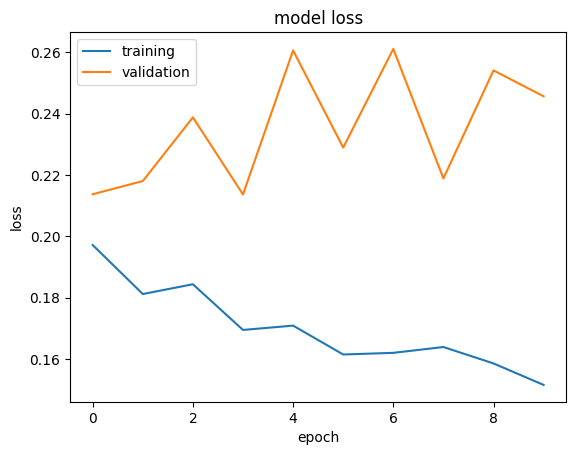

In [17]:
# Plot the progression of the training loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

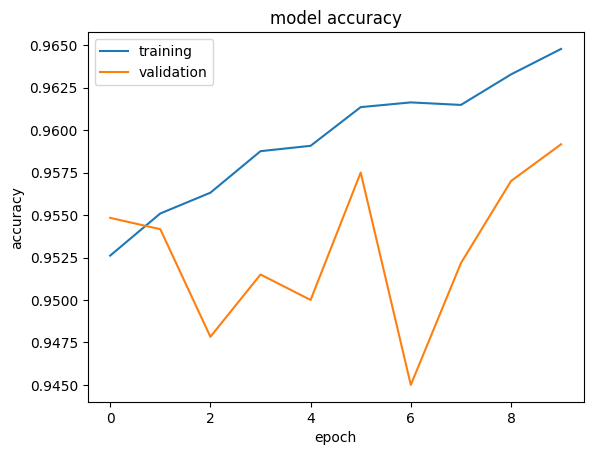

In [18]:
# Plot the progression of the training accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [20]:
# Evaluate model on test data - how often does the network predict the right label after training?

loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

# Make a confusion matrix to see which numbers are difficult to disentangle

y_pred_test = model.predict(x_test) # obtain one-hot encoded predictions for the x_test images
y_test_index      = [ np.argmax(i) for i in y_test ] # actual number known labels
y_pred_test_index = [ np.argmax(i) for i in y_pred_test ] # actual number predictions
y_pred_test_proba = [ y_pred_test[i][ y_pred_test_index[i] ] for i in range(len(y_test_index)) ] # probabilities to be correct

from sklearn.metrics import confusion_matrix
### STUDENT CODE HERE ###
### --> Now predict again the labels for the test images, but after proper training.
###  Build a confusion matrix to show which labels we often confuse with what.
###  (Note that the y_test and y_pred are still one-hot encoded, so you need to get
###   the index of the maximum entry to find the corresponding predicted 'number'.
cm = confusion_matrix(y_test_index, y_pred_test_index)

print("Confusion Matrix:\n", cm)
### END STUDENT CODE ###

Test loss: 0.28
Test accuracy: 0.952
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Confusion Matrix:
 [[ 961    0    0    0    0    3    3    1   12    0]
 [   3 1103    3    1    0    1    1    9   14    0]
 [   3    2  984    8    2    2    4   10   17    0]
 [   1    0    7  952    1    6    0   16   22    5]
 [   1    0    0    0  929    0    8    4   12   28]
 [   3    1    2   30    0  819    6    2   22    7]
 [   6    1    1    1    4   10  925    0   10    0]
 [   2    0   14    3    2    2    0  985    6   14]
 [   2    0    5   10    6   10    7    8  904   22]
 [   2    5    1    5    9    3    0   11   17  956]]


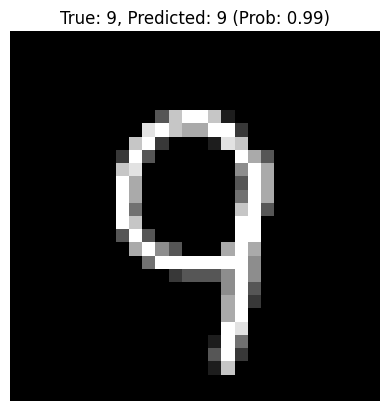

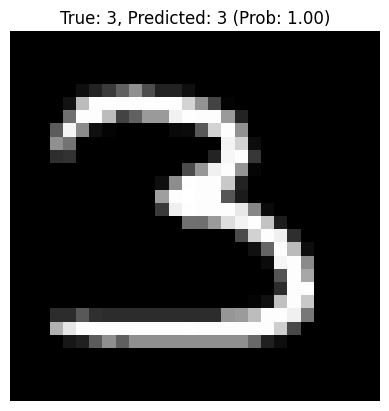

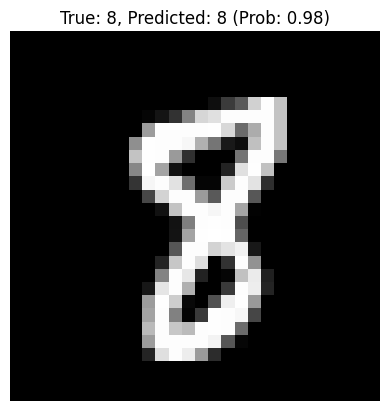

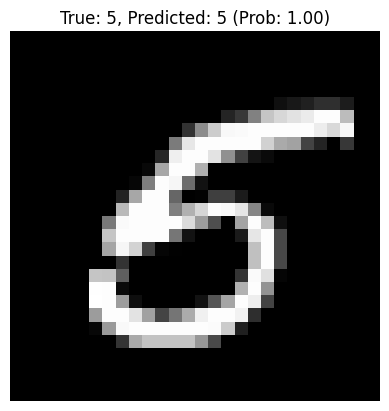

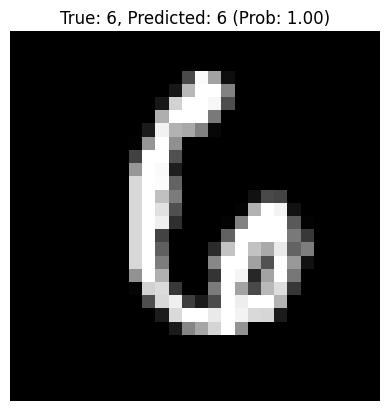

In [22]:
# Show some predicted labels and their probabilities to be correct

### STUDENT CODE HERE ###
### --> Now show some hand-written digit images from the test sample,
###  their corresponding true label, their predicted label from your network,
###  and the probability associated with that prediction.
import matplotlib.pyplot as plt
num_samples = 5  # You can change this number to display more or fewer samples
sample_indices = np.random.choice(len(x_test), num_samples, replace=False)

for i in sample_indices:
    # Reshape the flattened image to its original 28x28 size
    image = x_test[i].reshape(28, 28)

    # Get the true and predicted labels, and the associated probability
    true_label = y_test_index[i]
    predicted_label = y_pred_test_index[i]
    predicted_probability = y_pred_test_proba[i]

    # Display the image
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.title(f"True: {true_label}, Predicted: {predicted_label} (Prob: {predicted_probability:.2f})")
    plt.axis('off')
    plt.show()

### END STUDENT CODE ###